# **ABOUT DATASET**


**Index:** The index of the song

**Song Name:** Name of the song

**Artist:** Name of the artist of the song

**Popularity:** Percentage of how popular a song is 

**Release Date:** Year when the song was released

**Streams:** Total number of streams on Spotify

**Danceability:** Percentage indicating how suitable the song is for dancing

**Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

**Duration (ms):** The duration in miliseconds of a song

**Valence:** Positivity of the song's musical content

**Energy:** Perceived energy level of the song

**Acousticness:** Amount of acoustic sound in the song

**Liveness:** Presence of live performance elements

**Speechiness:** Amount of spoken words in the song


In [19]:
# We import the libraries we need for analysing the data: numpy, pandas, seaborn and matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# We specify how pandas should display the data

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [21]:
# We read the data from the .csv and drop the unnecessary columns: Highest Charting Position, Number of Times Charted, 
# Week of Highest, Ranking, Artist Followers, Weeks Charted, Song ID, Chord, Genre

spotify=pd.read_csv("spotify_dataset.csv", thousands=',', decimal=".")

spotify = spotify.drop(columns=['Highest Charting Position', 'Number of Times Charted', 'Week of Highest Charting', 
                                'Artist Followers', 'Weeks Charted', 'Genre', 'Chord', 'Song ID'])

spotify

,Index,Song Name,Streams,Artist,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,Beggin',48633449,Måneskin,2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2,STAY (with Justin Bieber),47248719,The Kid LAROI,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,3,good 4 u,40162559,Olivia Rodrigo,2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,4,Bad Habits,37799456,Ed Sheeran,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,5,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
5,6,MONTERO (Call Me By Your Name),30071134,Lil Nas X,2021-03-31,97,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758
6,7,Kiss Me More (feat. SZA),29356736,Doja Cat,2021-04-09,94,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742
7,8,Todo De Ti,26951613,Rauw Alejandro,2021-05-20,95,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342
8,9,Yonaguni,25030128,Bad Bunny,2021-06-04,96,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44
9,10,I WANNA BE YOUR SLAVE,24551591,Måneskin,2021-03-19,95,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958


# Cleaning

The aim of this is to:
* Check duplicate rows.
* Incorrect column data type.

In [22]:
spotify_copy = spotify.copy() #get a copy
songs = spotify_copy[['Index', 'Song Name', 'Streams', 'Artist', 'Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)',
       'Valence']]

Check on duplicate and drop where necessary.


In [23]:
duplicates = songs[songs[['Song Name','Artist']].duplicated()]
songs = songs.drop(duplicates.index.tolist())
songs.reset_index(drop=True, inplace=True) #reset index

Now that we got rid of all the duplicates, we will check if there are any rows with empty input and we will eliminate them. Afterwards, we will convert the input in every column to the data type that suits it the best.

In [24]:
remove_songs = spotify[spotify["Danceability"] == ' ']
spotify = spotify.drop(remove_songs.index.tolist())

spotify['Danceability'] = spotify['Danceability'].astype(float)
spotify['Energy'] = spotify['Energy'].astype(float)
spotify['Loudness'] = spotify['Loudness'].astype(float)
spotify['Speechiness'] = spotify['Speechiness'].astype(float)
spotify['Acousticness'] = spotify['Acousticness'].astype(float)
spotify['Liveness'] = spotify['Liveness'].astype(float)
spotify['Tempo'] = spotify['Tempo'].astype(float)
spotify['Valence'] = spotify['Valence'].astype(float)
spotify['Duration (ms)'] = spotify['Duration (ms)'].astype(np.int64)
spotify['Popularity'] = spotify['Popularity'].astype(np.int64)

spotify["Release Date"] = spotify["Release Date"].apply(lambda x: int(str(x)[:4]))
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1545 non-null   int64  
 1   Song Name      1545 non-null   object 
 2   Streams        1545 non-null   int64  
 3   Artist         1545 non-null   object 
 4   Release Date   1545 non-null   int64  
 5   Popularity     1545 non-null   int64  
 6   Danceability   1545 non-null   float64
 7   Energy         1545 non-null   float64
 8   Loudness       1545 non-null   float64
 9   Speechiness    1545 non-null   float64
 10  Acousticness   1545 non-null   float64
 11  Liveness       1545 non-null   float64
 12  Tempo          1545 non-null   float64
 13  Duration (ms)  1545 non-null   int64  
 14  Valence        1545 non-null   float64
dtypes: float64(8), int64(5), object(2)
memory usage: 193.1+ KB



# Data exploration 


We check how many rows and how many columns we have in our .csv now:

In [25]:
spotify.shape

(1545, 15)

We check what are the names of the columns we have in our database:

In [26]:
spotify.columns

Index(['Index', 'Song Name', 'Streams', 'Artist', 'Release Date', 'Popularity',
       'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Tempo', 'Duration (ms)', 'Valence'],
      dtype='object')

We are going to display the count, mean, standard deviation, minimum, maximum and the values of the 3 quantiles for the data in every column:

In [27]:
spotify.describe().T  # .T returns the transpose of the matrix (the names of the columns are on the Oy axis)

,count,mean,std,min,25%,50%,75%,max
Index,1545.0,7.791359e+02,4.495939e+02,1.000000e+00,3.890000e+02,7.800000e+02,1169.000,1.556000e+03
Streams,1545.0,6.337136e+06,3.375402e+06,4.176083e+06,4.915080e+06,5.269163e+06,6452492.000,4.863345e+07
Release Date,1545.0,2.018388e+03,7.803156e+00,1.942000e+03,2.020000e+03,2.020000e+03,2021.000,2.021000e+03
Popularity,1545.0,7.008932e+01,1.582403e+01,0.000000e+00,6.500000e+01,7.300000e+01,80.000,1.000000e+02
Danceability,1545.0,6.899968e-01,1.424440e-01,1.500000e-01,5.990000e-01,7.070000e-01,0.796,9.800000e-01
Energy,1545.0,6.334951e-01,1.615770e-01,5.400000e-02,5.320000e-01,6.420000e-01,0.752,9.700000e-01
Loudness,1545.0,-6.348474e+00,2.509281e+00,-2.516600e+01,-7.491000e+00,-5.990000e+00,-4.711,1.509000e+00
Speechiness,1545.0,1.236557e-01,1.103827e-01,2.320000e-02,4.560000e-02,7.650000e-02,0.165,8.840000e-01
Acousticness,1545.0,2.486945e-01,2.503259e-01,2.550000e-05,4.850000e-02,1.610000e-01,0.388,9.940000e-01
Liveness,1545.0,1.812024e-01,1.440710e-01,1.970000e-02,9.660000e-02,1.240000e-01,0.217,9.620000e-01


We check what data types we have in each column:

In [28]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1545 non-null   int64  
 1   Song Name      1545 non-null   object 
 2   Streams        1545 non-null   int64  
 3   Artist         1545 non-null   object 
 4   Release Date   1545 non-null   int64  
 5   Popularity     1545 non-null   int64  
 6   Danceability   1545 non-null   float64
 7   Energy         1545 non-null   float64
 8   Loudness       1545 non-null   float64
 9   Speechiness    1545 non-null   float64
 10  Acousticness   1545 non-null   float64
 11  Liveness       1545 non-null   float64
 12  Tempo          1545 non-null   float64
 13  Duration (ms)  1545 non-null   int64  
 14  Valence        1545 non-null   float64
dtypes: float64(8), int64(5), object(2)
memory usage: 193.1+ KB


We check if there are still any NaN values in any of the columns:

In [29]:
spotify.isna().sum()

Index            0
Song Name        0
Streams          0
Artist           0
Release Date     0
Popularity       0
Danceability     0
Energy           0
Loudness         0
Speechiness      0
Acousticness     0
Liveness         0
Tempo            0
Duration (ms)    0
Valence          0
dtype: int64

There are no NaN elements in either column of the database.

# Data Analysis

Now that the data is clean, we are ready to analyse it. We are going to loook at:
* which are the most streamed songs;
* which are the most streamed artists;
* how many songs does each artist have in the list of most streamed songs;
* what is the correlation between the popularity/number of streams a song has and danceability, energy, valence, loudness, acoustics, speechiness, liveness, tempo and the duration

## Most Streamed Song:

In [30]:
most_streamed_songs = spotify[['Artist','Song Name','Streams']].nlargest(10,'Streams')
display(most_streamed_songs)

,Artist,Song Name,Streams
0,Måneskin,Beggin',48633449
1,The Kid LAROI,STAY (with Justin Bieber),47248719
2,Olivia Rodrigo,good 4 u,40162559
3,Ed Sheeran,Bad Habits,37799456
4,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),33948454
5,Lil Nas X,MONTERO (Call Me By Your Name),30071134
6,Doja Cat,Kiss Me More (feat. SZA),29356736
1430,"Justin Bieber, Quavo",Intentions,28509534
7,Rauw Alejandro,Todo De Ti,26951613
8,Bad Bunny,Yonaguni,25030128


*Beggin'* from *Måneskin* was the most streamed song, with over **4.86B+** views

We are going to create a bar chart to visualise the number of streams for the top 10 most streamed songs.

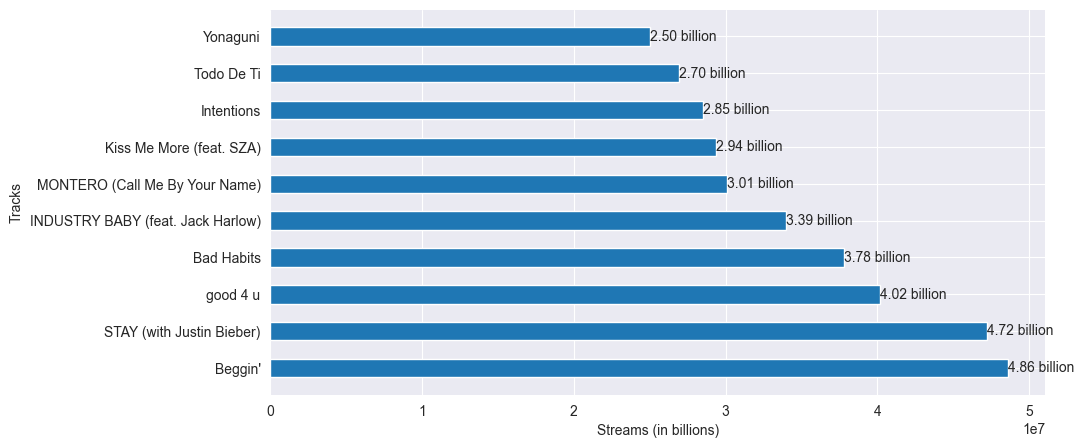

In [31]:
top_10_streams = spotify.nlargest(10, 'Streams')
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.barh(top_10_streams['Song Name'], top_10_streams['Streams'], height = 0.5);
ax.set(xlabel='Streams (in billions)',ylabel= 'Tracks')
ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**7:.2f} billion')
#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)

## Most Streamed Artist:

In [32]:
most_streamed_artists = spotify.groupby('Artist')[['Streams']].sum().nlargest(10,'Streams')
display(most_streamed_artists)

,Streams
Artist,
Taylor Swift,381480455
BTS,238400020
Justin Bieber,225842427
Lil Uzi Vert,208822039
Bad Bunny,203813133
Pop Smoke,173634217
Juice WRLD,166703004
Olivia Rodrigo,163685977
Eminem,162935796


**Taylor Swift** tops as the most Streamed artist on Spotify in 2020.

## How many songs does each artist have on the most streamed song list:


In [33]:
total_appearances = len(spotify)
artist_appearances_count = spotify['Artist'].value_counts().reset_index()
artist_appearances_count.columns = ['Artist', 'count']
artist_appearances_count['percentage_of_total'] = (artist_appearances_count['count'] / total_appearances) * 100
most_appeared_artists_percentage = artist_appearances_count.nlargest(10, 'percentage_of_total')
display(most_appeared_artists_percentage)

,Artist,count,percentage_of_total
0,Taylor Swift,52,3.365696
1,Justin Bieber,32,2.071197
2,Lil Uzi Vert,32,2.071197
3,Juice WRLD,30,1.941748
4,Pop Smoke,29,1.877023
5,BTS,29,1.877023
6,Bad Bunny,28,1.812298
7,Eminem,22,1.423948
8,The Weeknd,21,1.359223
9,Drake,19,1.229773


**3.34%** of song list was released by Taylor Swift, Lil Uzi Vert and Justin Bieber coming second with **2.056%** each.

## What makes the best song the best:

We are going to create the correlation matrix of the dataset, in order to check how much do all the parameters depend on each other. The correlation between danceability and energy will be of the most interest.

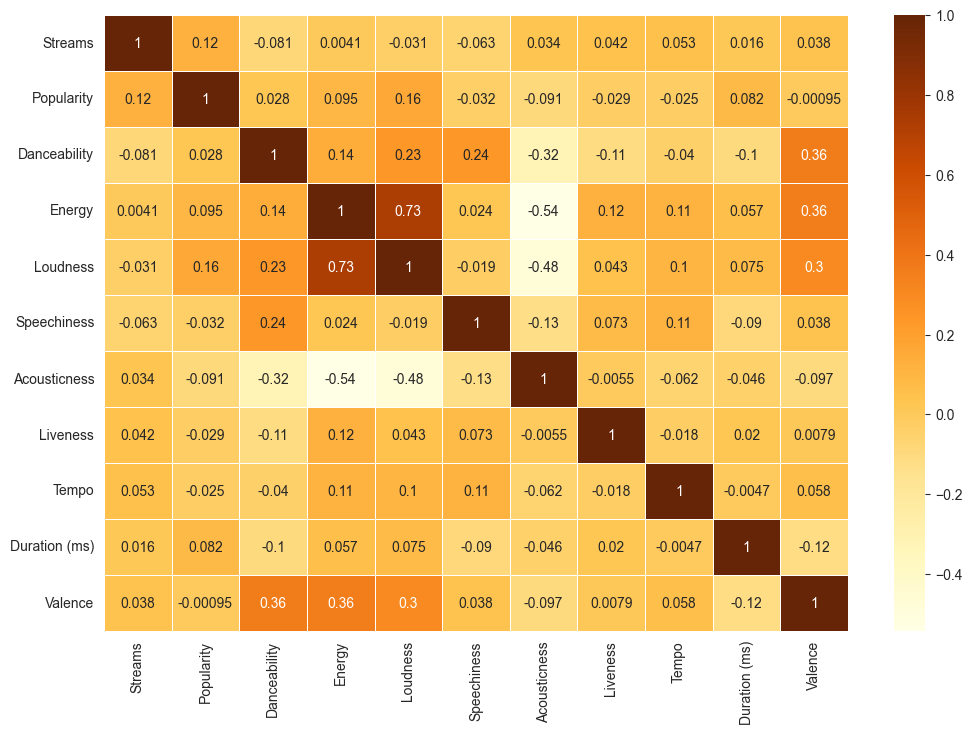

In [34]:
cols=[ 'Streams', 'Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)',
       'Valence']
correlation_matrix = spotify[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=.5)
plt.show()

Danceability, Loudness and Speechiness have weak negative correlation with the number of streams, indicating a mild inverse relationship.
It should be noted that the practical significance of these weak correlations may be limited.


* *Danceable Songs*: There is a moderate positive correlation between danceability and valence. This suggests that when aiming to create a danceable song, it's likely to have a more positive or cheerful mood (valence).
* *Energetic Songs*: You found a moderate negative correlation between acousticness and energy. This implies that songs with lower acousticness (less acoustic, more electronic) tend to have higher energy levels. Therefore, if you're looking to create a more energetic song, reducing acoustic elements and incorporating more electronic or produced elements may be effective
* *Loud Songs*: There is a strong positive correlation between the loudness of a song and its energy level. This means that the louder the song is, the more energetic it will be.

# Descriptive Statistics

## Histograms for the Descriptive Statistics of Each Variable

<Figure size 640x480 with 0 Axes>

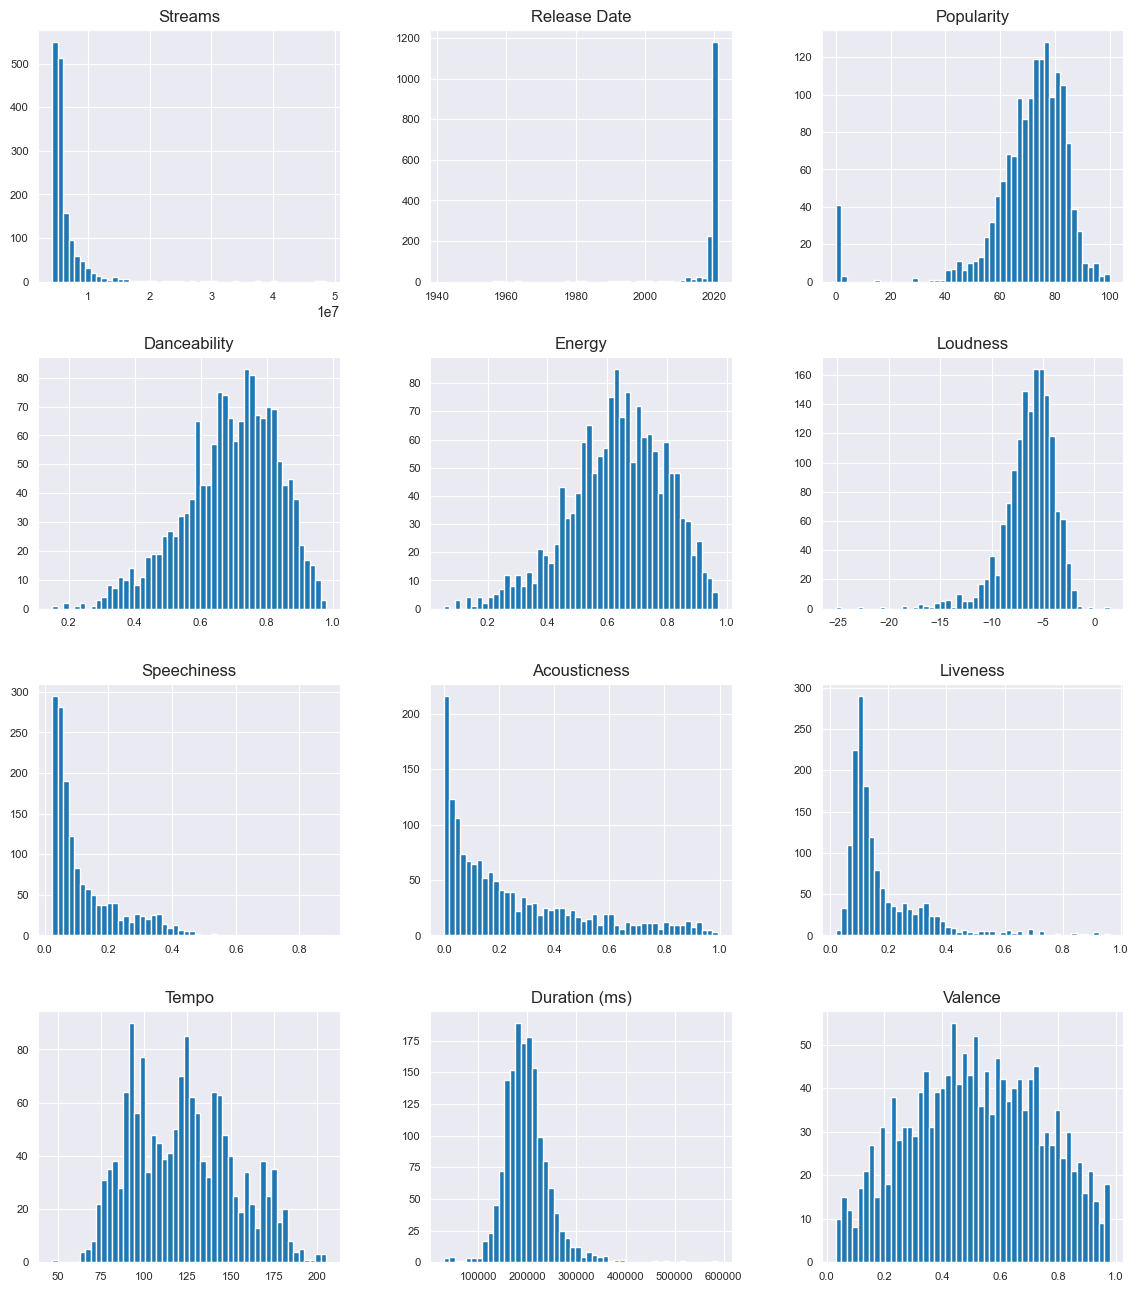

In [35]:
fig = plt.figure()

# plt.scatter(spotify["Loudness"], spotify["Energy"])
spotify.drop("Index", axis=1).hist(figsize=(14, 16), bins=50, xlabelsize=8, ylabelsize=8);

## Scatterplots to Visualize the Spread of Variables and Their Relationship with the Stream Count

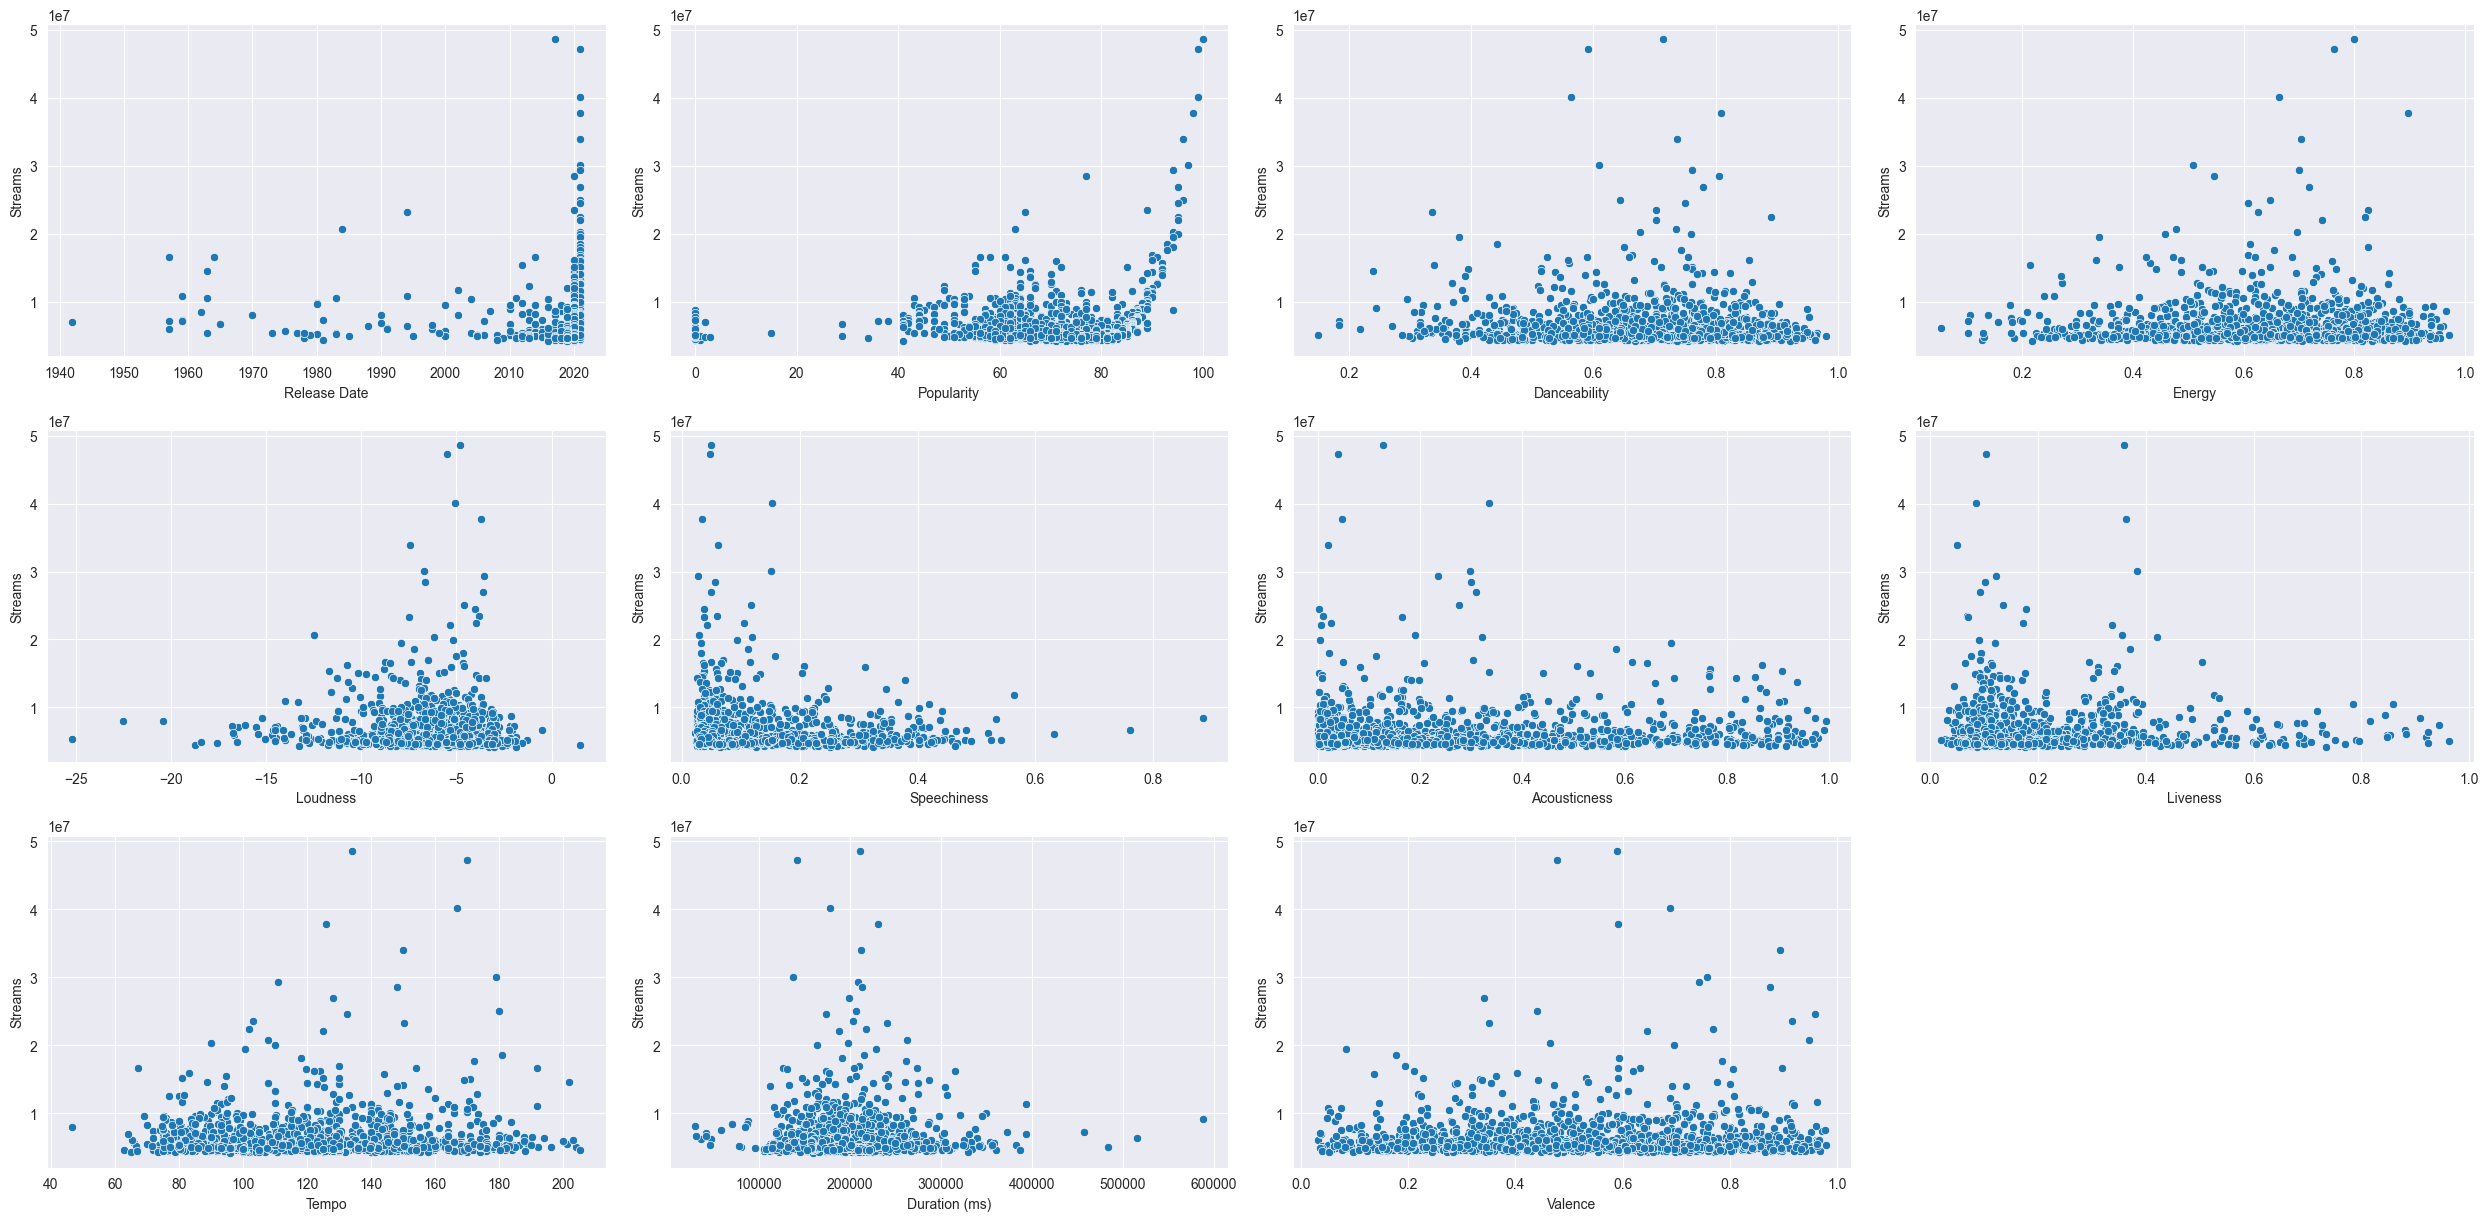

In [36]:
spotify_without_strs = spotify.drop("Index", axis = 1)
spotify_without_strs = spotify_without_strs.drop("Song Name", axis = 1)
spotify_without_strs = spotify_without_strs.drop("Artist", axis = 1)

plt.figure(figsize=(25,20))

int_no_stream = [col for col in spotify_without_strs.columns
                   if col != 'Streams']

for i, col in enumerate(int_no_stream):
    plt.subplot(5,4, i+1)
    sns.scatterplot(data=spotify_without_strs, x=col, y='Streams')
    
plt.tight_layout()
plt.show()

## Box plots to Analyse the Distribution of Track Metrics per Year of Release

### 1. Danceability:

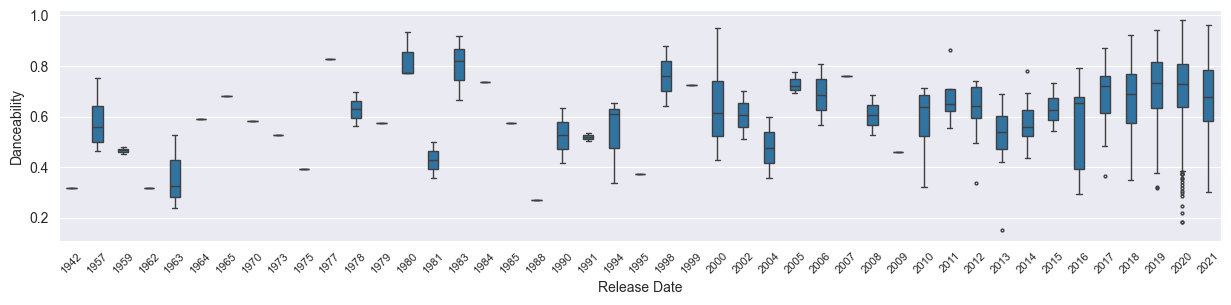

In [37]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Danceability', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* Tracks that are released from the year 2019 to 2020 have almost similar median danceability, and almost similar interquartile range. The same goes for the songs released in 2017 and 2021.
* Tracks that are released from 2010 to 2021 have wide range of danceability. It could be due to the majority of the top tracks were released in these years.
* The most danceable track in the top streamed songs was released in 2020.
* The least danceable track in the top streamed songs was released in 2013.

### 2. Energy:

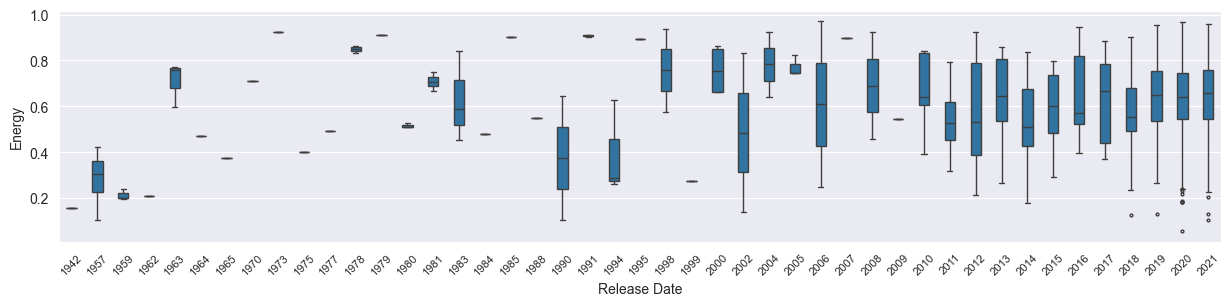

In [38]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Energy', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* Top tracks from 2010 to 2021 contain a wide range of tracks from energetic to less energetic, but with median values at the 60 to 70% energy percentage.
* The median values of the most streamed tracks are 50% or more, with the exception of 1957, 1990, 1994, and years with single tracks that made it to the most streamed. This shows that listeners prefer to listen to energetic tracks.

### 3. Loudness:

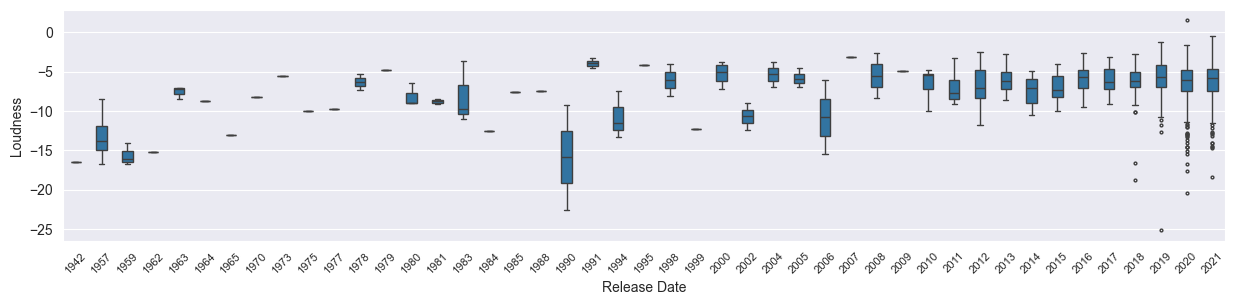

In [39]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Loudness', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* Tracks that are released from the year 2008 to 2021 have almost similar median loudness, and almost similar interquartile range.
* The loudest track was released in 2020.
* The least loud track was released in 2019.

### 4. Speechiness:

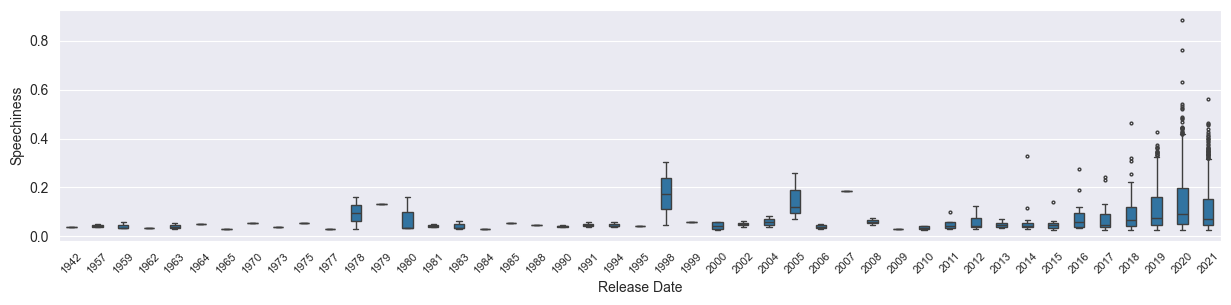

In [40]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Speechiness', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* With the exception on the years 1978, 1979, 1998, 2005, all the tracks released between 1042 and 2021 that made it into the most streamed songs have low median speechiness. This means that people prefer to listen to songs which do not contain many lyrics.

### 5. Acousticness:

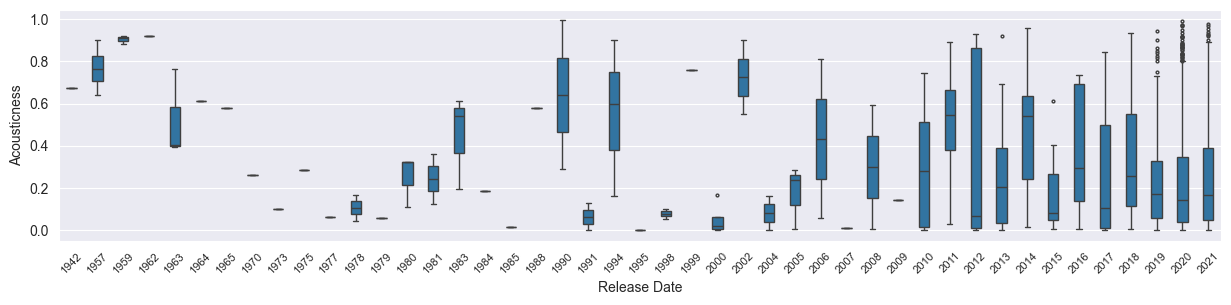

In [41]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Acousticness', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* Tracks from 2010 to 2021 contain high variety of songs with different acousticness values, as shown in the long whiskers and long interquartile range.
* Older tracks seem to fall under a small range of acousticness levels.

### 6. Liveness:

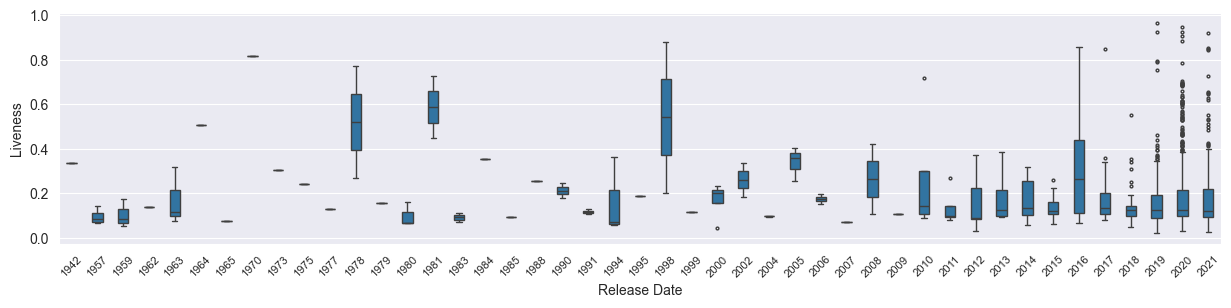

In [42]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Liveness', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* A huge number of top streamed tracks have values of less than 50% liveness, with whiskers and interquartile range falling below 50%.
* Tracks which are performed live fall to the outliers, which means than listeners prefer to listen to recorded tracks.

### 7. Tempo:

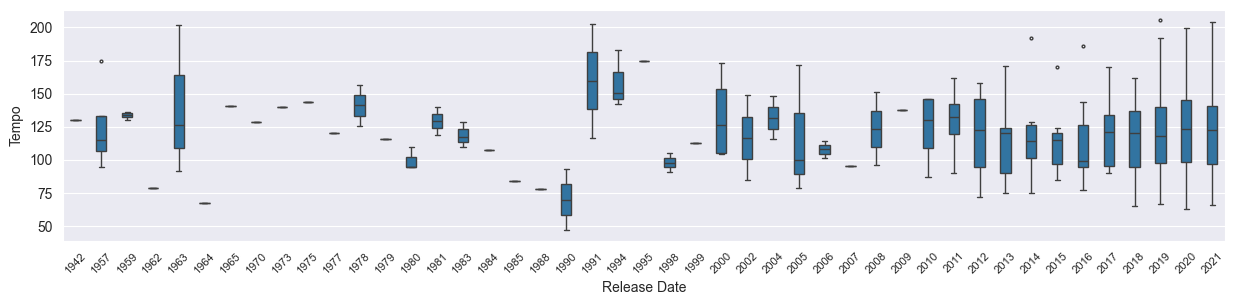

In [43]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Tempo', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* Tracks from 2019 to 2020 have a wide range of values for tempo, but a similar median value at approximately 125.

### 8. Duration:

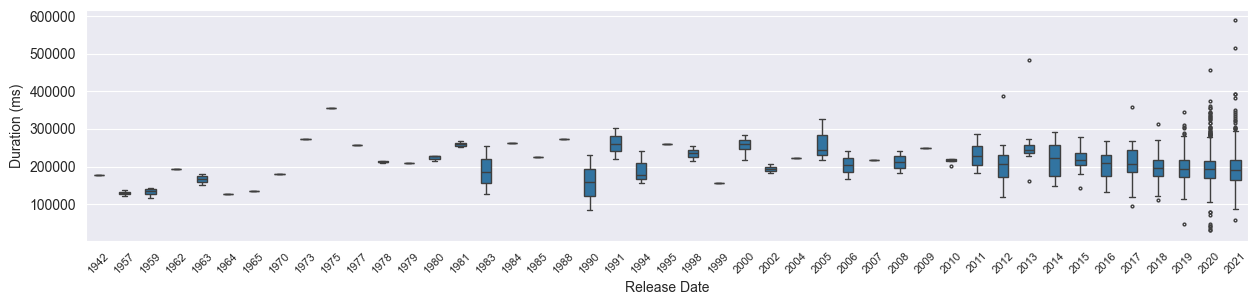

In [44]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Duration (ms)', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* Tracks from 2018 to 2021 seem to have approximately the same lengths, with median duration at 200000 ms.
* Longer songs tend to be outliers, meaning that people prefer to listen to shorter songs.

### 9. Valence:

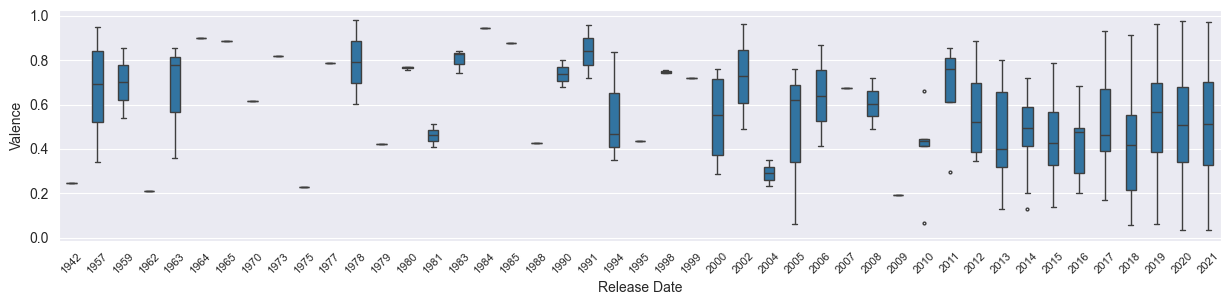

In [45]:
plt.subplots(1,1, figsize=(15,3))
sns.boxplot(data=spotify, x='Release Date', y='Valence', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

* Tracks from 2018 to 2021 show a wide variety of moods in the top streamed songs, long whiskers extending from low valence to high valence, and median values at approximately 50%.
* Tracks from 2012 to 2021 have median valence at approximately 40 to 50%, with the exception of 2014. The range is also at the middle of the chart, ranging 20 to 70%, which shows the neutrality of the mood in the top streamed songs.